In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
corridas_por_empresa = pd.read_csv('/datasets/project_sql_result_01.csv')
bairros_destino = pd.read_csv('/datasets/project_sql_result_04.csv')


In [8]:
print("📦 Tabela de corridas por empresa:")
print(corridas_por_empresa.head(), "\n")

print("📍 Tabela de destinos por bairro:")
print(bairros_destino.head())

📦 Tabela de corridas por empresa:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299 

📍 Tabela de destinos por bairro:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [9]:
print("\n🔍 Tipos de dados (corridas por empresa):")
print(corridas_por_empresa.info())

print("\n🔍 Tipos de dados (bairros de destino):")
print(bairros_destino.info())



🔍 Tipos de dados (corridas por empresa):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

🔍 Tipos de dados (bairros de destino):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [10]:
top10_bairros = bairros_destino.sort_values(by='average_trips', ascending=False).head(10)
print("\n🏙️ Top 10 bairros por número médio de viagens:")
print(top10_bairros)


🏙️ Top 10 bairros por número médio de viagens:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


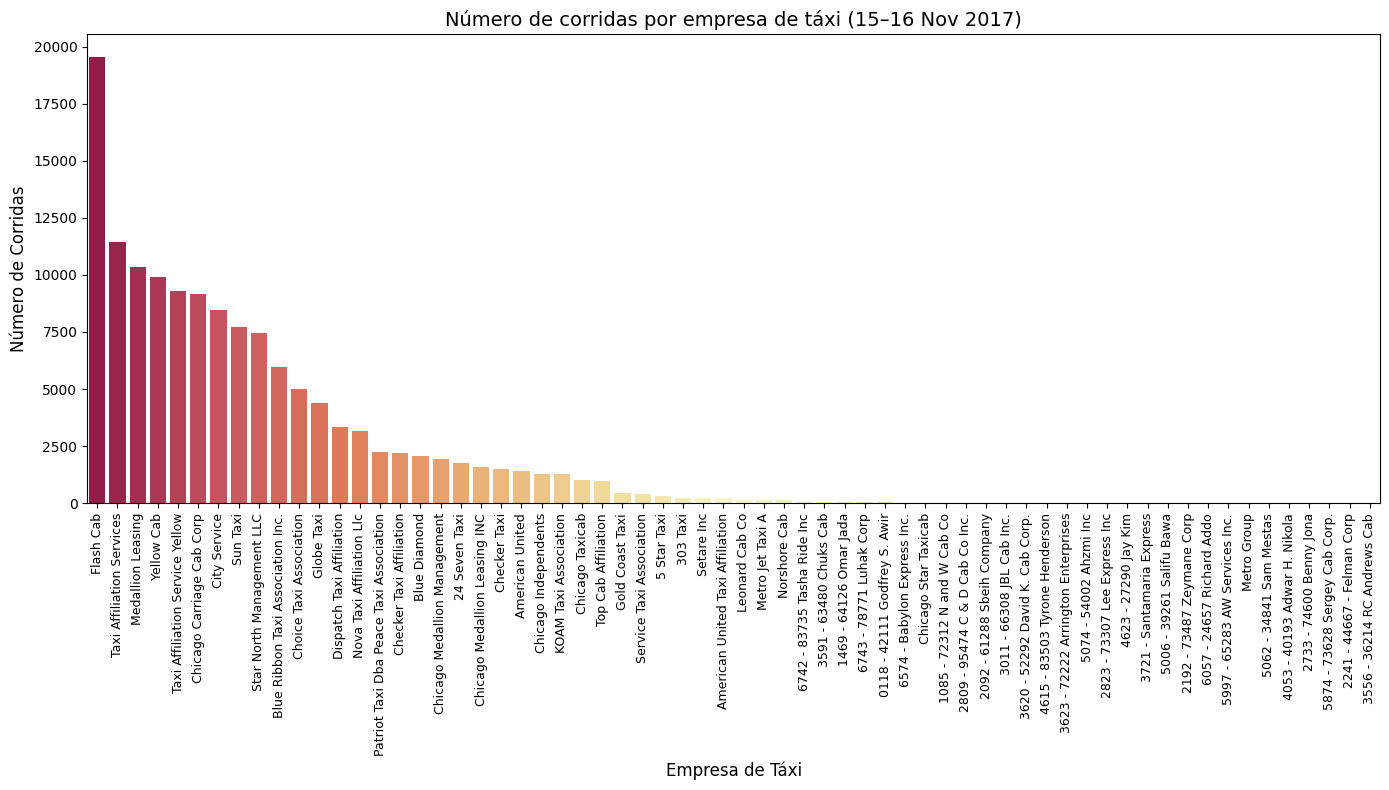

In [11]:
plt.figure(figsize=(14, 8))
sns.barplot(data=corridas_por_empresa, x='company_name', y='trips_amount', palette='Spectral')
plt.title('Número de corridas por empresa de táxi (15–16 Nov 2017)', fontsize=14)
plt.xlabel('Empresa de Táxi', fontsize=12)
plt.ylabel('Número de Corridas', fontsize=12)
plt.xticks(rotation=90, fontsize=9)  # Gira os nomes das empresas
plt.tight_layout()
plt.show()

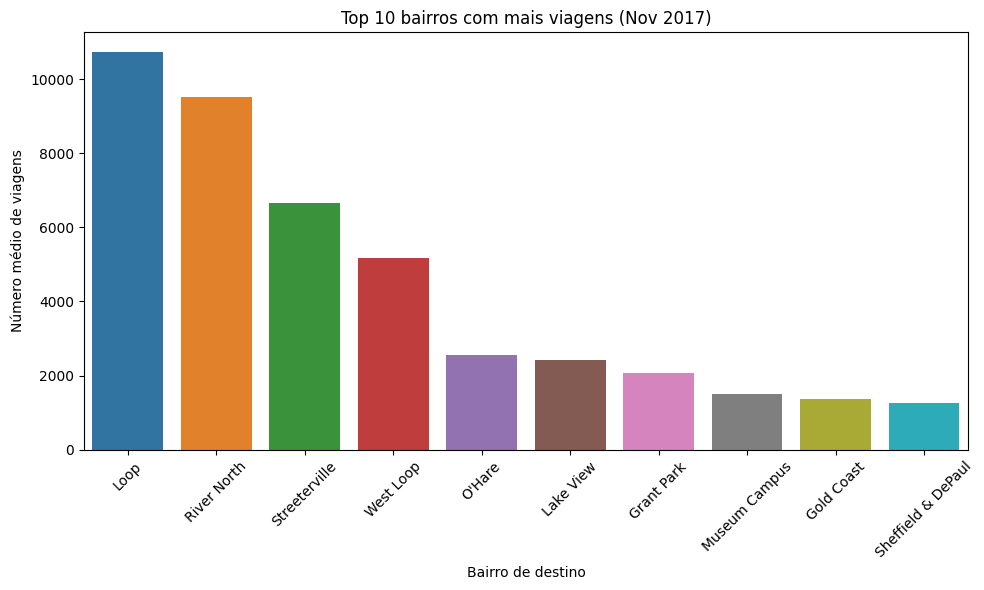

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_bairros, x='dropoff_location_name', y='average_trips')
plt.title('Top 10 bairros com mais viagens (Nov 2017)')
plt.xlabel('Bairro de destino')
plt.ylabel('Número médio de viagens')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
from scipy.stats import ttest_ind, levene

dados = pd.read_csv('/datasets/project_sql_result_07.csv')

# Preparar os dados
dados['start_ts'] = pd.to_datetime(dados['start_ts'])
dados['weekday'] = dados['start_ts'].dt.dayofweek  # sábado = 5

# Filtrar somente os sábados
sabados = dados[dados['weekday'] == 5]

# Grupos: condições ruins vs boas
chuva = sabados[sabados['weather_conditions'] == 'Bad']
sem_chuva = sabados[sabados['weather_conditions'] == 'Good']

# Verificar tamanhos
print(f'Corridas em sábados com clima ruim: {len(chuva)}')
print(f'Corridas em sábados com clima bom: {len(sem_chuva)}')

# Teste de Levene
stat_levene, p_levene = levene(chuva['duration_seconds'], sem_chuva['duration_seconds'])
equal_var = p_levene > 0.05

print(f'Teste de Levene - p-valor: {p_levene:.4f}')
print(f'Usar equal_var={equal_var} no teste t')

# Teste t de Student
stat, p_valor = ttest_ind(chuva['duration_seconds'], sem_chuva['duration_seconds'], equal_var=equal_var)

# Resultado
print(f'Estatística t: {stat:.2f}')
print(f'Valor-p: {p_valor:.4f}')

if p_valor < 0.05:
    print('Rejeitamos H₀: Há diferença significativa na duração das corridas.')
else:
    print('Falhamos em rejeitar H₀: Não há evidência de diferença na duração.')

Corridas em sábados com clima ruim: 180
Corridas em sábados com clima bom: 888
Teste de Levene - p-valor: 0.5332
Usar equal_var=True no teste t
Estatística t: 6.95
Valor-p: 0.0000
Rejeitamos H₀: Há diferença significativa na duração das corridas.
